# Simulações usando VAR e Redes Neurais para avaliar o impacto dos desembolsos realizados pelo BNDES na taxa de investimento da Economia Brasileira

## Introdução

## Revisão Bibliográfica


## Metodologia


## Resultados

### Bibliotecas para executar as simulações

In [1]:
from lib import *
from simulator import *

### Funções para executar as simulações

In [6]:
def run_lstm(data):
    """
    Função que executa a simulação com a arquitetura de rede LSTM.

    Returns
    -------
    None.

    """
    # [4, 36, 36, 5, 300, 300, 32]
    config = config_model(n_steps=[36], n_train_steps=[36],
                          n_nodes=[300], n_epochs=[300], n_batch=[32])

    simulator = Simulator(data, config)
    simulator.set_model_arch('LSTM')
    best_res, best_par = simulator.run_simulation()

    # Carrega o modelo que apresentou o melhor resultado na simulação
    best_model, best_res, n_inputs = simulator.load_best_model()

    df_proj, pred_list = simulator.forecast(data, n_inputs, 24, best_model)

    model_name = 'Inv_{}'.format(simulator.get_model_arch())

    # Cria Data Frame a partir da melhor previsão dentro da amostra
    df_NN = pd.DataFrame(best_res, columns=[model_name])
    df_NN.index = data.index[-len(df_NN):]

    # Cria Data Frame com todos os resultados
    df_proj = pd.concat([df_proj, df_NN], axis=1)

    plot_results(df_proj, model_name)

    return df_proj, simulator


def run_lstm_bidirecccional(data):
    """
    Função que executa a simulação com a arquitetura de rede LSTM-Bidirecional.

    Returns
    -------
    None.

    """
    # [4, 36, 36, 5, 300, 300, 12]
    config = config_model(n_steps=[36], n_train_steps=[36],
                          n_nodes=[300], n_epochs=[300], n_batch=[12])

    simulator = Simulator(data, config)
    simulator.set_model_arch('LSTM-B')
    best_res, best_par = simulator.run_simulation()

    # Carrega o modelo que apresentou o melhor resultado na simulação
    best_model, best_res, n_inputs = simulator.load_best_model()

    df_proj, pred_list = simulator.forecast(data, n_inputs, 24, best_model)

    model_name = 'Inv_{}'.format(simulator.get_model_arch())

    # Cria Data Frame a partir da melhor previsão dentro da amostra
    df_NN = pd.DataFrame(best_res, columns=[model_name])
    df_NN.index = data.index[-len(df_NN):]

    # Cria Data Frame com todos os resultados
    df_proj = pd.concat([df_proj, df_NN], axis=1)

    plot_results(df_proj, model_name)

    return df_proj, simulator


def run_lstm_stacked(data):
    """
    Função que executa a simulação com a arquitetura de rede LSTM empilhado.

    Returns
    -------
    None.

    """
    #[4, 36, 36, 5, 100, 300, 12]
    config = config_model(n_steps=[36], n_train_steps=[36],
                          n_nodes=[100], n_epochs=[300], n_batch=[12])

    simulator = Simulator(data, config)
    simulator.set_model_arch('LSTM-S')
    best_res, best_par = simulator.run_simulation()

    # Carrega o modelo que apresentou o melhor resultado na simulação
    best_model, best_res, n_inputs = simulator.load_best_model()

    df_proj, pred_list = simulator.forecast(data, n_inputs, 24, best_model)

    model_name = 'Inv_{}'.format(simulator.get_model_arch())

    # Cria Data Frame a partir da melhor previsão dentro da amostra
    df_NN = pd.DataFrame(best_res, columns=[model_name])
    df_NN.index = data.index[-len(df_NN):]

    # Cria Data Frame com todos os resultados
    df_proj = pd.concat([df_proj, df_NN], axis=1)

    plot_results(df_proj, model_name)

    return df_proj, simulator


def run_gru(data):
    """
    Função que executa a simulação com a arquitetura de rede GRU.

    Returns
    -------
    None.

    """
    # [4, 36, 36, 5, 100, 150, 36]
    config = config_model(n_steps=[36], n_train_steps=[36],
                          n_nodes=[100], n_epochs=[150], n_batch=[36])

    simulator = Simulator(data, config)
    simulator.set_model_arch('GRU')
    best_res, best_par = simulator.run_simulation()

    # Carrega o modelo que apresentou o melhor resultado na simulação
    best_model, best_res, n_inputs = simulator.load_best_model()

    df_proj, pred_list = simulator.forecast(data, n_inputs, 24, best_model)

    model_name = 'Inv_{}'.format(simulator.get_model_arch())

    # Cria Data Frame a partir da melhor previsão dentro da amostra
    df_NN = pd.DataFrame(best_res, columns=[model_name])
    df_NN.index = data.index[-len(df_NN):]

    # Cria Data Frame com todos os resultados
    df_proj = pd.concat([df_proj, df_NN], axis=1)

    plot_results(df_proj, model_name)

    return df_proj, simulator


@tf.autograph.experimental.do_not_convert
def run_cnn_lstm(data):
    """
    Função que executa a simulação com a arquitetura de rede CNN-LSTM.

    Returns
    -------
    None.

    """
    #[4, 36, 36, 5, 300, 250, 12]
    config = config_model(n_steps=[36], n_train_steps=[36],
                          n_nodes=[300], n_epochs=[250], n_batch=[12])

    simulator = Simulator(data, config)
    simulator.set_model_arch('CNN-LSTM')
    best_res, best_par = simulator.run_simulation()

    # Carrega o modelo que apresentou o melhor resultado na simulação
    best_model, best_res, n_inputs = simulator.load_best_model()

    df_proj, pred_list = simulator.forecast(data, n_inputs, 24, best_model)

    model_name = 'Inv_{}'.format(simulator.get_model_arch())

    # Cria Data Frame a partir da melhor previsão dentro da amostra
    df_NN = pd.DataFrame(best_res, columns=[model_name])
    df_NN.index = data.index[-len(df_NN):]

    # Cria Data Frame com todos os resultados
    df_proj = pd.concat([df_proj, df_NN], axis=1)

    plot_results(df_proj, model_name)

    return df_proj, simulator

def plot_results(data, model_name):
    """
     Função para visualização da série original, previsão do modelo dentro da amostra
     e previsão do modelo fora da amostra

    Parameters
    ----------
    data : TYPE
        DESCRIPTION.
    model_name : TYPE
        DESCRIPTION.

    Returns
    -------
    None.

    """

    plt.figure()
    plt.plot(data.index, data['Inv'],
             label='Valores Observados')
    plt.plot(data.index, data[str(model_name)],
             label='Rede Neural - dentro da amostra', color='black')
    plt.plot(data.index, data['Prediction'],
             label='Rede Neural - fora da amostra', color='blue')

    plt.title('Previsões com Modelo de Redes Neurais Recorrentes')
    plt.xlabel('Ano')
    plt.ylabel('Investimento (%PIB)')
    plt.legend()
    plt.savefig('{}/forecast-{}'.format(FIGS_FLD, model_name))
    plt.show()


def run_neuralVAR(data):
    config = config_model(n_steps=[36], n_train_steps=[36],
                          n_nodes=[300], n_epochs=[250], n_batch=[12])

    simulator = Simulator(data, config)
    simulator.neural_VAR(max_var_order=6)

        

def run_ARIMA(data):

    config = []

    simulator = Simulator(data, config)
    arima_result = simulator.ARIMA()

    n_ahead = 36

    dates_forecast = pd.date_range(start=data.index[-1], periods=n_ahead + 1, freq='M')
    forecast = pd.DataFrame(arima_result.predict(n_ahead), index=dates_forecast[1:], columns=['Predictions'])

    predictions = pd.concat([data['Inv'], forecast], axis=0)
    predictions.columns = ['Inv', 'Predictions']

    plt.figure()
    plt.plot(predictions.index[-n_ahead:], predictions['Predictions'][-n_ahead:])
    plt.plot(predictions.index[:-n_ahead], predictions['Inv'][:-n_ahead])
    plt.title('Previsões com Modelo ARIMA')
    plt.xlabel('Ano')
    plt.ylabel('Investimento (%PIB)')
    plt.legend()
    plt.savefig('{}/forecast-{}'.format(FIGS_FLD, 'ARIMA'))
    plt.show()

    return predictions

def synthetic_forecast(data, n_artificial=12):
    """
    Função para realizar a previsão a partir de dados sintéticos
    
    
    """
    data_obs = data.iloc[-n_artificial:, :]
    
    # Parâmetros para configuração do modelo LSTM
    config = config_model(n_steps=[36], n_train_steps=[24],
                          n_nodes=[300], n_epochs=[300], n_batch=[32])

    cols = []
    for i in data.columns:
        cols.append(i + '-Inv')

    cols.insert(0, 'Inv')

    artificial_in = data['Inv']
    for i in range(data_obs.shape[1]):
        data_new = data.iloc[:-n_artificial, :]
        data_artificial = np.zeros((n_artificial, 5), dtype='float')
        data_artificial[0, i] = 1

        simulator = Simulator(data_new, config)
        simulator.set_model_arch('LSTM')
        simulator.set_nrep(1)
        simulator.set_wrt_model(False)

        data_artificial = pd.DataFrame(data_artificial, columns=data.columns)
        data_artificial.index = data_obs.index

        data_new = pd.concat((data_new, data_artificial), axis=0)

        result_mean, perf_mean, cfg = simulator.eval_model(config[0])

        artificial_index = config[0][1] + config[0][2] + n_artificial
        pred = pd.DataFrame(result_mean, index=data.index[artificial_index:])
        artificial_in = pd.concat([artificial_in, pred], axis=1)

    artificial_in.columns = cols
    artificial_out = data
    dates_forecast = pd.date_range(start=data.index[-1], periods=2, freq='M')
    forecast = pd.DataFrame(np.zeros((1, 5)), index=dates_forecast[1:], columns=data.columns)
    data_new = pd.concat([data, forecast], axis=0)
    predictions = pd.DataFrame()
    # [4, 36, 36, 5, 300, 300, 32]
    for i in range(artificial_out.shape[1]):
        data_new.iloc[-1][i] = 1
        simulator = Simulator(data_new, config)
        simulator.set_model_arch('LSTM')
        simulator.set_nrep(1)
        simulator.set_wrt_model(False)

        # Carrega o modelo que apresentou o melhor resultado na simulação
        best_model, best_res, n_inputs = simulator.load_best_model()
        df_proj, pred_list = simulator.forecast(data_new, n_inputs, n_artificial, best_model)
        pred = df_proj['Prediction']
        predictions = pd.concat([predictions, pred], axis=1)
        data_new.iloc[-1][i] = 0.

    predictions.iloc[-(n_artificial + 1)] = np.ones(5)
    predictions.columns = cols[1:]
    artificial_out = pd.concat([data_new, pd.DataFrame(best_res,
                                                       index=data.index[-len(best_res):], columns=['Pred-LSTM']),
                                predictions], axis=1)

    with open('{}/{}-steps_insample_pred.pkl'.format(PKL_FLD, n_artificial), 'wb') as fp:
        pickle.dump(artificial_in, fp)
    with open('{}/{}-steps_outsample_par.pkl'.format(PKL_FLD, n_artificial), 'wb') as fp:
        pickle.dump(artificial_out, fp)
        
    return articifial_in, artificial_out    
        
  

In [3]:
# abre arquivo para gravar a saída da simulação
logging.basicConfig(filename='{}/{}-app.log'.format(LOGS_FLD, datetime.now().strftime("%Y%m%d-%H%M%S")),
                    level=logging.INFO)
logging.info('## Início do log ##')
# Versões dos pacotes usados neste código
get_ipython().run_line_magic('reload_ext', 'watermark')
get_ipython().run_line_magic('watermark', '-a "Carlos Eduardo Veras Neves" --iversions')


# Prepara diretórios para armazenar arquivos gerados pela simulação
makedirs(MODELS_FLD)
makedirs(FIGS_FLD)
makedirs(LOGS_FLD)
makedirs(PKL_FLD)


json                                       2.0.9
IPython.core.release                       7.16.1
matplotlib                                 3.2.2
pandas                                     1.0.5
logging                                    0.5.1.2
statsmodels.api                            0.11.1
pmdarima                                   1.6.1
numpy                                      1.18.5
ipywidgets                                 7.5.1
tensorflow                                 2.1.0
tensorflow_core.python.keras.api._v2.keras 2.2.4-tf
Carlos Eduardo Veras Neves


       Agropecuária  Indústria  Infraestrutura  Comércio e serviços  \
count     72.000000  72.000000       72.000000            72.000000   
mean       0.135622   0.565348        0.495093             0.219978   
std        0.065522   0.458333        0.270936             0.153548   
min        0.053407   0.028426        0.085215             0.022447   
25%        0.091239   0.265550        0.274034             0.104358   
50%        0.118062   0.540207        0.491297             0.175733   
75%        0.149423   0.709280        0.658696             0.336986   
max        0.370092   2.638441        1.143117             0.832406   

           Total  Investimento  
count  72.000000     72.000000  
mean    1.416042     17.987601  
std     0.779904      2.096092  
min     0.202680     14.268541  
25%     0.939751     16.376876  
50%     1.439447     17.847753  
75%     1.773297     20.039805  
max     3.913393     21.525857  


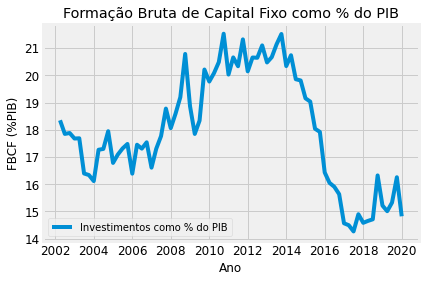

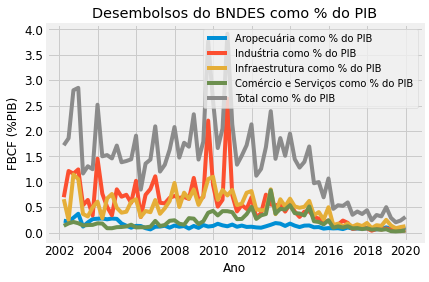

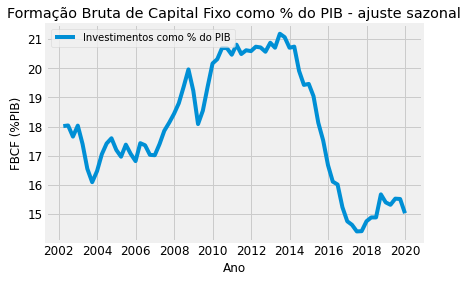

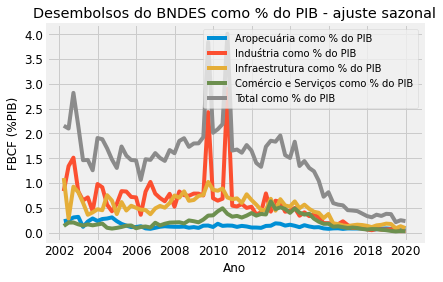

##################################################
# Matriz de Correlação #
          Agr       Ind       Inf       Com       Tot       Inv
Agr  1.000000  0.434997  0.470210  0.120841  0.532269  0.193207
Ind  0.434997  1.000000  0.684401  0.309378  0.915265  0.427234
Inf  0.470210  0.684401  1.000000  0.577190  0.890311  0.742500
Com  0.120841  0.309378  0.577190  1.000000  0.585665  0.907597
Tot  0.532269  0.915265  0.890311  0.585665  1.000000  0.698271
Inv  0.193207  0.427234  0.742500  0.907597  0.698271  1.000000
##################################################


In [4]:
# carrega dados para a simula;áo
df = load_data()
var = ['Inv', 'Agr', 'Ind', 'Inf', 'Com']

df = df[var]

### Modelo ARIMA

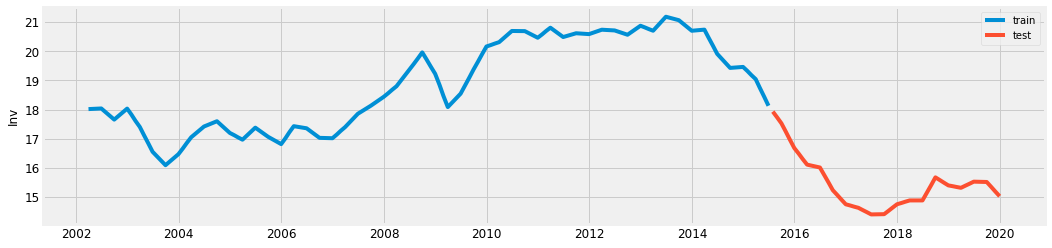

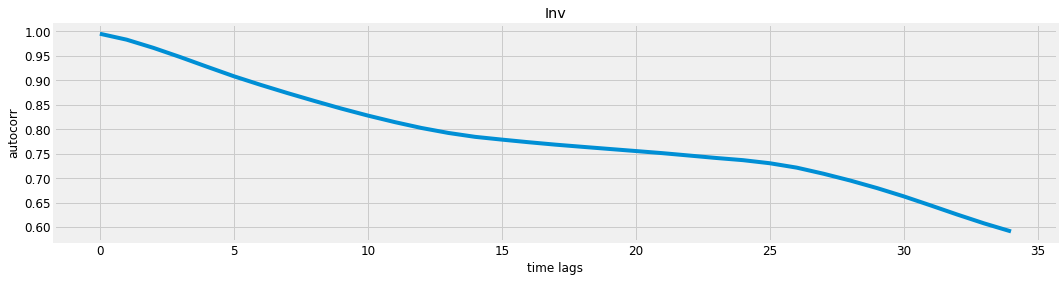

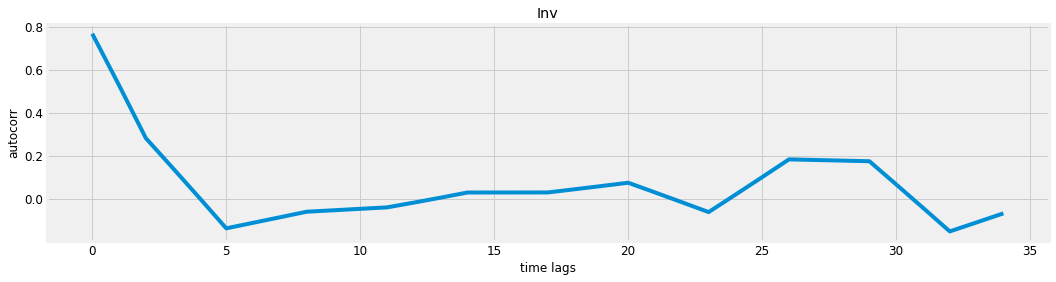

Performing stepwise search to minimize aic
Fit ARIMA(1,1,1)x(0,1,1,12) [intercept=True]; AIC=-330.343, BIC=-313.827, Time=1.315 seconds
Fit ARIMA(0,1,0)x(0,1,0,12) [intercept=True]; AIC=-59.398, BIC=-52.792, Time=0.102 seconds
Fit ARIMA(1,1,0)x(1,1,0,12) [intercept=True]; AIC=-261.541, BIC=-248.328, Time=0.459 seconds
Fit ARIMA(0,1,1)x(0,1,1,12) [intercept=True]; AIC=-258.952, BIC=-245.739, Time=0.921 seconds
Near non-invertible roots for order (0, 1, 1)(0, 1, 1, 12); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.999)
Fit ARIMA(0,1,0)x(0,1,0,12) [intercept=False]; AIC=-61.391, BIC=-58.088, Time=0.068 seconds
Fit ARIMA(1,1,1)x(0,1,0,12) [intercept=True]; AIC=-225.175, BIC=-211.962, Time=0.223 seconds
Fit ARIMA(1,1,1)x(1,1,1,12) [intercept=True]; AIC=-328.385, BIC=-308.565, Time=1.584 seconds
Near non-invertible roots for order (1, 1, 1)(1, 1, 1, 12); setting score to inf (at least one inverse root too close to the border of the unit circle

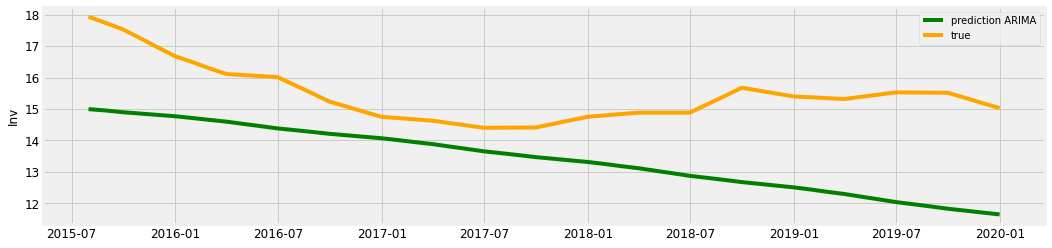

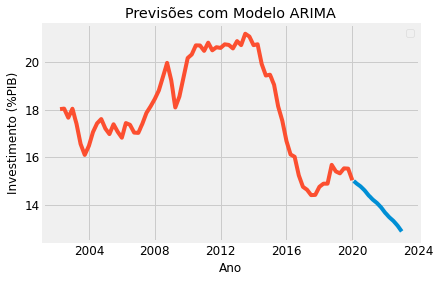

In [7]:
arima_res = run_ARIMA(df)


### Modelo LSTM

  0%|                                                                                           | 0/10 [00:00<?, ?it/s]


Total de Combinações de Hiperparâmetros: 1




Progress-grid search: |--------------------------------------------------| 0.0% Complete



##################################################
 --- Avaliando do Modelo : ---
##################################################


######################################################################
## Parâmetros: 
4-n_endog,36-n_steps,36-n_train_steps,5-n_features
300-n_nodes,300-n_epochs,32-n_batch
 ## 
2020/07/16-02:07:17



##################################################


 10%|████████▎                                                                          | 1/10 [00:17<02:36, 17.37s/it]


MSE:0.34-RMSE:0.58-MAPE:0.34



 20%|████████████████▌                                                                  | 2/10 [00:31<02:12, 16.51s/it]


MSE:0.3-RMSE:0.54-MAPE:0.3



 30%|████████████████████████▉                                                          | 3/10 [00:46<01:51, 15.95s/it]


MSE:0.35-RMSE:0.59-MAPE:0.35



 40%|█████████████████████████████████▏                                                 | 4/10 [01:01<01:33, 15.53s/it]


MSE:0.69-RMSE:0.83-MAPE:0.69



 50%|█████████████████████████████████████████▌                                         | 5/10 [01:15<01:16, 15.21s/it]


MSE:0.34-RMSE:0.59-MAPE:0.34



 60%|█████████████████████████████████████████████████▊                                 | 6/10 [01:30<01:00, 15.07s/it]


MSE:0.59-RMSE:0.77-MAPE:0.59



 70%|██████████████████████████████████████████████████████████                         | 7/10 [01:46<00:45, 15.29s/it]


MSE:0.38-RMSE:0.62-MAPE:0.38



 80%|██████████████████████████████████████████████████████████████████▍                | 8/10 [02:00<00:30, 15.13s/it]


MSE:0.31-RMSE:0.56-MAPE:0.31



 90%|██████████████████████████████████████████████████████████████████████████▋        | 9/10 [02:15<00:15, 15.04s/it]


MSE:0.28-RMSE:0.53-MAPE:0.28



100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [02:30<00:00, 15.06s/it]


MSE:0.32-RMSE:0.57-MAPE:0.32





Progress-grid search: || 100.0% Complete


MSE: (0.38989336004418435)

00:02:30.67
Parâmetros do melhor modelo:[4, 36, 36, 5, 300, 300, 32]
Menor MSE: 0.39


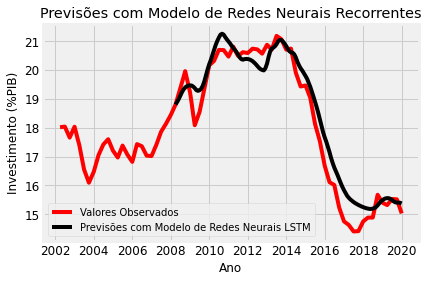

[4, 36, 36, 5, 300, 300, 32]
##################################################
# Melhor Modelo :
Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_9 (LSTM)                (None, 300)               367200    
_________________________________________________________________
dropout_18 (Dropout)         (None, 300)               0         
_________________________________________________________________
dense_18 (Dense)             (None, 200)               60200     
_________________________________________________________________
dropout_19 (Dropout)         (None, 200)               0         
_________________________________________________________________
dense_19 (Dense)             (None, 1)                 201       
Total params: 427,601
Trainable params: 427,601
Non-trainable params: 0
_________________________________________________________________
################

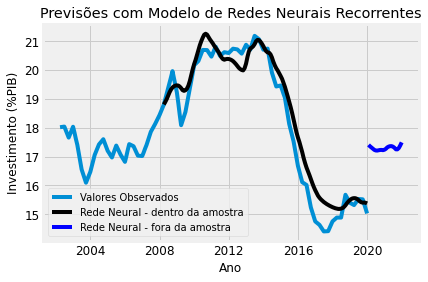

In [8]:
lstm_res, lstm_obj = run_lstm(df)

### Modelo LSTM Bidirecional

In [ ]:
lstmB_res, lstmB_obj run_lstm_bidirecccional(df)


### Modelo LSTM Empilhado

In [ ]:
lstmS_res, lstmS_obj = run_lstm_stacked(df)


### Modelo GRU

In [ ]:
gru_res, gru_obj = run_gru(df)


### Modelo CNN-LSTM

In [ ]:
cnn_res, cnn_obj = run_cnn_lstm(df)


### Modelo LSTM-VAR

In [ ]:
lstmV_res = run_LSTM_VAR(df)

### Realiza Previsões com dados sintéticos para avaliar impacto das variáveis

In [5]:
synthetic_forecast(df)
logging.info('## Fim do log ##')

NameError: name 'Simulator' is not defined

## Conclusões